In [2]:
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace

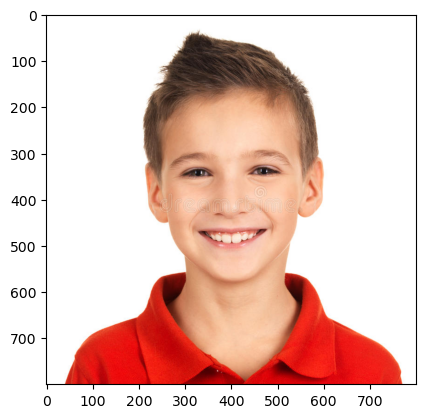

In [3]:
img=cv2.imread('happy_boy.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [4]:
prediction=DeepFace.analyze(img)
prediction

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.34it/s]


[{'emotion': {'angry': 3.276983860980696e-14,
   'disgust': 1.840843019598512e-17,
   'fear': 8.009280044740663e-09,
   'happy': 100.0,
   'sad': 1.812004729205216e-11,
   'surprise': 4.58430006195637e-11,
   'neutral': 8.096066927976153e-07},
  'dominant_emotion': 'happy',
  'region': {'x': 192, 'y': 177, 'w': 418, 'h': 418},
  'age': 22,
  'gender': {'Woman': 1.2210525572299957, 'Man': 98.7789511680603},
  'dominant_gender': 'Man',
  'race': {'asian': 0.0035716540878638625,
   'indian': 0.027857127133756876,
   'black': 0.0005082421012048144,
   'white': 86.1900269985199,
   'middle eastern': 8.585510402917862,
   'latino hispanic': 5.192525684833527},
  'dominant_race': 'white'}]

In [5]:
prediction[0]['dominant_emotion']

'happy'

__From now on we will care only about the dominant emotion__

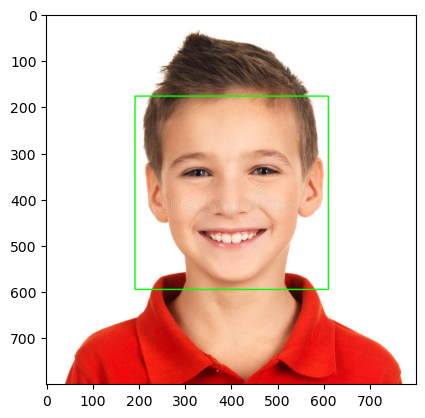

In [6]:
#to draw a rectangle across the face
faceCascade= cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
#gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#convert the picture to gray
faces=faceCascade.detectMultiScale(img,1.1,4)#return the coordinates of the box
for x,y,w,h in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)#opencv deal with BGR
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [ ]:
font=cv2.FONT_HERSHEY_SIMPLEX


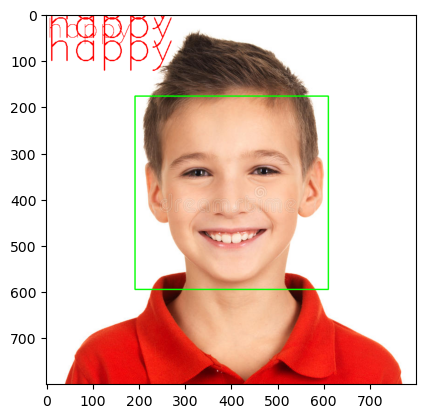

In [11]:
cv2.putText(img,
            prediction[0]['dominant_emotion'],(0,100),font,3,(0,0,255),2,cv2.LINE_4) ;
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

# now it it's time for a real time deployment.

__the code below will put all the three steps together__

In [1]:
import cv2
from deepface import DeepFace
import matplotlib.pyplot as plt


faceCascade= cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

vid = cv2.VideoCapture(0)

"""
if not cap.isOpened():
    cap=cv2.VideoCapture(1)
if not cap.isOpened():
    raise IOError("Cannot open web cam")"""

while(True):
    ret,frame=vid.read()#this command will read one frame at a time 

    result=DeepFace.analyze(img_path = frame, actions = ['emotion'])#for each frame this command will detect the emotion 
    

    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(frame, 1.1 ,4)
    
    #Draw a rectangle around the faces
    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y), (x+w,y+h),(0,255,0),2)
    
    font=cv2.FONT_HERSHEY_SIMPLEX
    
    cv2.putText(frame,
                result[0]['dominant_emotion'],
                (50, 50),
                font, 3,
                (0,0,255),
                2,
                cv2.LINE_4)
    cv2.imshow('video',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
    
vid.release()
cv2.destroyAllWindows()
        

Action: emotion: 100%|███████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.44it/s]


Action: emotion: 100%|███████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.66it/s]
